## 例題

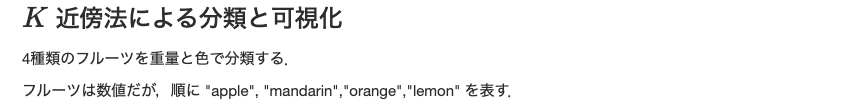

In [1]:
from IPython.display import Image
Image('knn.png')

## 解答

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
fruit = pd.read_csv('http://logopt.com/data/fruit_simple.csv')
fruit.head()

,fruit_label,mass,color_score
0,1,192,0.55
1,1,180,0.59
2,1,176,0.60
3,2,86,0.80
4,2,84,0.79


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz
from sklearn import metrics

In [6]:
X = fruit.drop('fruit_label', axis=1)
y = fruit.fruit_label
X = StandardScaler().fit_transform(X)

正解率= 0.9322033898305084


/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/contrib/classifier/boundaries.py:440: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cmap=ListedColormap(colors.values()),


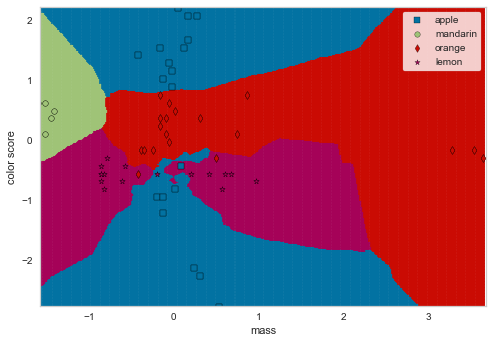

In [7]:
knn = KNeighborsClassifier(3)
knn.fit(X, y)
y_pred = knn.predict(X)
print('正解率=', metrics.accuracy_score(y, y_pred))

viz = DecisionViz(
    knn,
    title='Nearest Neighbors',
    features=['mass', 'color score'],
    classes=['apple', 'mandarin', 'orange', 'lemon'],
)
viz.fit(X, y)
viz.draw(X, y)
viz.show();

### tensorflow

In [8]:
import tensorflow as tf
import random
import os
from sklearn.preprocessing import LabelBinarizer

In [9]:
def set_seed_for_tf(seed=1):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(1)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [10]:
print(X.shape)
print(X[:3])

(59, 2)
[[ 0.52944179 -2.79359541]
 [ 0.30946246 -2.26868417]
 [ 0.23613601 -2.13745636]]


In [11]:
y[:3]

0    1
1    1
2    1
Name: fruit_label, dtype: int64

#### Sequential API

In [12]:
set_seed_for_tf()

In [13]:
y.unique()

array([1, 2, 3, 4])

In [14]:
y_lb = LabelBinarizer().fit_transform(y)
y_lb[:3]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(4, activation=None)
])

In [16]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['categorical_accuracy']
)

In [17]:
epochs = 10000
history = model.fit(X, y_lb, epochs=epochs, verbose=0)

In [18]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

In [19]:
losses = history.history['loss']
accs = history.history['categorical_accuracy']

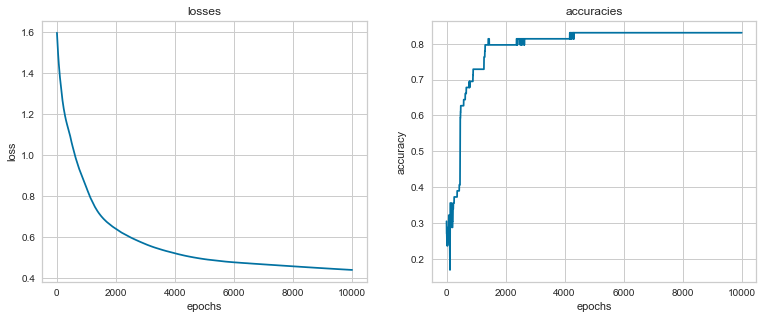

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12.8, 4.8))

axes[0].plot(np.arange(0, epochs)+1, losses)
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[0].set_title('losses')

axes[1].plot(np.arange(0, epochs)+1, accs)
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].set_title('accuracies')

plt.show()

#### Functional API

In [21]:
set_seed_for_tf()

In [22]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(2, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(4, activation=None)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['categorical_accuracy']
)

In [24]:
epochs = 10000
history = model.fit(X, y_lb, epochs=epochs, verbose=0)

In [25]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

In [26]:
losses = history.history['loss']
accs = history.history['categorical_accuracy']

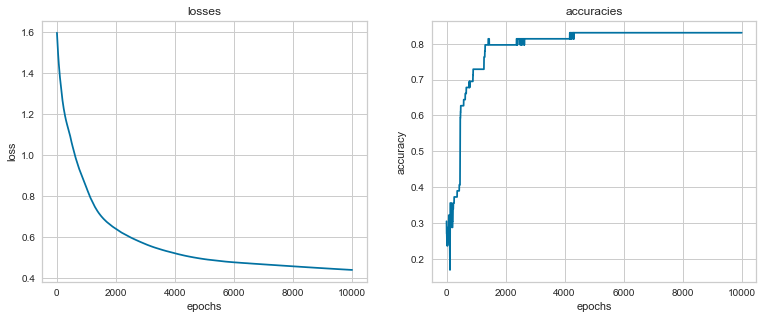

In [27]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12.8, 4.8))

axes[0].plot(np.arange(0, epochs)+1, losses)
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[0].set_title('losses')

axes[1].plot(np.arange(0, epochs)+1, accs)
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].set_title('accuracies')

plt.show()

### XGBoost

In [28]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [29]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [30]:
dtrain = xgb.DMatrix(X, label=y_le)

In [31]:
param = {
    'objective': 'multi:softmax',
    'eval_metric': ['merror', 'mlogloss'],
    'num_class': len(np.unique(y_le))
}

In [32]:
evallist = [(dtrain, 'train')]
num_round = 10

In [33]:
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-merror:0.05085	train-mlogloss:0.98942
[1]	train-merror:0.05085	train-mlogloss:0.73722
[2]	train-merror:0.05085	train-mlogloss:0.56641
[3]	train-merror:0.05085	train-mlogloss:0.44552
[4]	train-merror:0.05085	train-mlogloss:0.35949
[5]	train-merror:0.03390	train-mlogloss:0.29516
[6]	train-merror:0.01695	train-mlogloss:0.24738
[7]	train-merror:0.01695	train-mlogloss:0.21054
[8]	train-merror:0.01695	train-mlogloss:0.18255
[9]	train-merror:0.01695	train-mlogloss:0.16328


In [34]:
y_pred = bst.predict(dtrain).astype(int)
y_pred = le.inverse_transform(y_pred)
y_pred

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [35]:
accuracy_score(y, y_pred)

0.9830508474576272

### LightGBM

In [36]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [37]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [38]:
dtrain_lgb = lgb.Dataset(X, label=y_le)
dval_lgb = lgb.Dataset(X, reference=dtrain_lgb)

In [39]:
params = {
    'objective': 'multiclass',
    'metric': [''],
    'num_class': len(np.unique(y_le)),
    'verbose': -1  # suppress warning during training
}

In [40]:
num_round = 100
bst = lgb.train(
    params, dtrain_lgb,
    num_round, valid_sets=[dval_lgb]
)

[1]	valid_0's multi_logloss: 1.13663
[2]	valid_0's multi_logloss: 1.14295
[3]	valid_0's multi_logloss: 1.15111
[4]	valid_0's multi_logloss: 1.16093
[5]	valid_0's multi_logloss: 1.17207
[6]	valid_0's multi_logloss: 1.1834
[7]	valid_0's multi_logloss: 1.1867
[8]	valid_0's multi_logloss: 1.19522
[9]	valid_0's multi_logloss: 1.20258
[10]	valid_0's multi_logloss: 1.21237
[11]	valid_0's multi_logloss: 1.22394
[12]	valid_0's multi_logloss: 1.23373
[13]	valid_0's multi_logloss: 1.24527
[14]	valid_0's multi_logloss: 1.25471
[15]	valid_0's multi_logloss: 1.26344
[16]	valid_0's multi_logloss: 1.2746
[17]	valid_0's multi_logloss: 1.27204
[18]	valid_0's multi_logloss: 1.28261
[19]	valid_0's multi_logloss: 1.29556
[20]	valid_0's multi_logloss: 1.30819
[21]	valid_0's multi_logloss: 1.32041
[22]	valid_0's multi_logloss: 1.32247
[23]	valid_0's multi_logloss: 1.32876
[24]	valid_0's multi_logloss: 1.33005
[25]	valid_0's multi_logloss: 1.33708
[26]	valid_0's multi_logloss: 1.33967
[27]	valid_0's multi_log

In [41]:
y_pred = bst.predict(X)
y_pred[:3]

array([[0.59293123, 0.0016378 , 0.08668351, 0.31874746],
       [0.59293123, 0.0016378 , 0.08668351, 0.31874746],
       [0.70106801, 0.0019365 , 0.10249255, 0.19450294]])

In [42]:
y_pred = bst.predict(X)
y_pred = np.argmax(y_pred, axis=1)
y_pred = le.inverse_transform(y_pred)
y_pred

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [43]:
accuracy_score(y, y_pred)

0.9322033898305084

#### テスト

In [44]:
X_copy = X.copy()
X_copy[:3]

array([[ 0.52944179, -2.79359541],
       [ 0.30946246, -2.26868417],
       [ 0.23613601, -2.13745636]])

In [45]:
X_copy = np.hstack([
    X_copy,
    np.repeat('test', X_copy.shape[0]).reshape(-1, 1)
])
X_copy[:3]

array([['0.5294417927792777', '-2.7935954116573223', 'test'],
       ['0.30946245634281716', '-2.2686841718873167', 'test'],
       ['0.236136010863997', '-2.1374563619448153', 'test']], dtype='<U32')

In [46]:
X_copy = pd.DataFrame(X_copy)
X_copy = X_copy.astype({0: 'float', 1: 'float', 2: 'category'})
X_copy.head(3)

,0,1,2
0,0.529442,-2.793595,test
1,0.309462,-2.268684,test
2,0.236136,-2.137456,test


In [47]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [48]:
dtrain_lgb = lgb.Dataset(X_copy, label=y_le)
dval_lgb = lgb.Dataset(X_copy, reference=dtrain_lgb)

In [49]:
params = {
    'objective': 'multiclass',
    'metric': [''],
    'num_class': len(np.unique(y_le)),
    'verbose': -1  # suppress warning during training
}

In [50]:
num_round = 5
bst = lgb.train(
    params, dtrain_lgb,
    num_round, valid_sets=[dval_lgb]
)

[1]	valid_0's multi_logloss: 1.13663
[2]	valid_0's multi_logloss: 1.14295
[3]	valid_0's multi_logloss: 1.15111
[4]	valid_0's multi_logloss: 1.16093
[5]	valid_0's multi_logloss: 1.17207


/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


In [51]:
y_pred = bst.predict(X_copy)
y_pred[:3]

array([[0.36109356, 0.05206995, 0.19262268, 0.39421381],
       [0.36109356, 0.05206995, 0.19262268, 0.39421381],
       [0.36109356, 0.05206995, 0.19262268, 0.39421381]])

In [52]:
y_pred = bst.predict(X_copy)
y_pred = np.argmax(y_pred, axis=1)
y_pred = le.inverse_transform(y_pred)
y_pred

array([4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [53]:
accuracy_score(y, y_pred)

0.5423728813559322